In [138]:
import pandas as pd
import os
import numpy as np
import calendar
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from itertools import combinations
from collections import Counter

### Merging 12 months of sale data into a single file

In [2]:
#read the path
file_path = "./Sales_Data"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
df_allData = pd.DataFrame()

# append the CSV files
for file in file_list:
    file_full_path = file_path + '/' + file
    df = pd.read_csv(file_full_path)
    df_allData = pd.concat([df_allData,df])

df_allData.to_csv('all_data.csv', index=False)

### Read in updated datafream

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the data!!

#### Drop rows of NaN

In [5]:
dropna_data = all_data.dropna(how='all')
dropna_data.head()
all_data = dropna_data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' Value in Month and delete it

In [6]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

all_data = all_data.loc[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to te correct type (str to numeric)

In [7]:
all_data.loc[:, 'Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data.loc[:, 'Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add Month Column

In [10]:
all_data.loc[:, 'Month'] = all_data['Order Date'].str[0:2]
all_data = all_data.dropna(subset=['Month'])
all_data.loc[:, 'Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Q1: What was the best month for sales? How much was earned that month?


In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
results = all_data.groupby('Month').sum() #sum() returns the sum of the values for the requested axis
best_month = results['Sales'].idxmax() #idxmax() returns the index of the maximum value
best_month_sales = results['Sales'].max() #max() returns the maximum value

best_month_name = calendar.month_name[int(best_month)]
print(f"Best month for sales: {best_month_name} with sales of ${best_month_sales}")

Best month for sales: December with sales of $4613443.340001534


#### Visualization

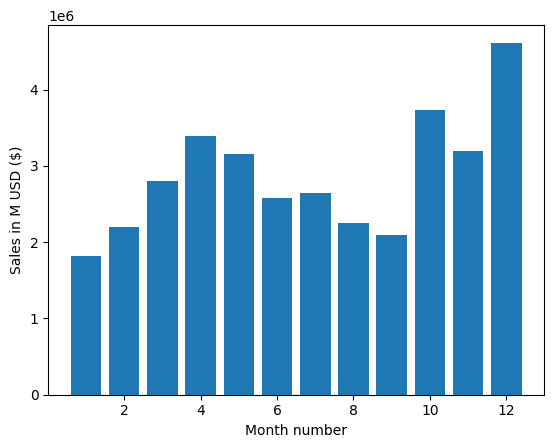

In [12]:
plt.bar(results.index, results['Sales']) #plt.bar(x,y)
plt.ylabel('Sales in M USD ($)')
plt.xlabel('Month number')
plt.show()

### Q2: What city sold the most product?

#### Add City Column

In [13]:
def get_state(x):
    return x.split(',')[1]

all_data['City'] = ""
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1].str.strip() + ' (' + all_data['Purchase Address'].str.split(',').str[2].str.split(' ').str[1] + ')'
all_data.head()
# Apply method
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

# Drop a column
# all_data = all_data.drop(columns='Column Name')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Calculate Amount of products

In [14]:
product_per_city = all_data.groupby('City').sum()
city = product_per_city['Sales'].idxmax()
sales_city = product_per_city['Sales'].max()
print(f"City with the highest sales: {city} with sales of ${sales_city}")

City with the highest sales: San Francisco (CA) with sales of $8262203.910004012


#### Visualization

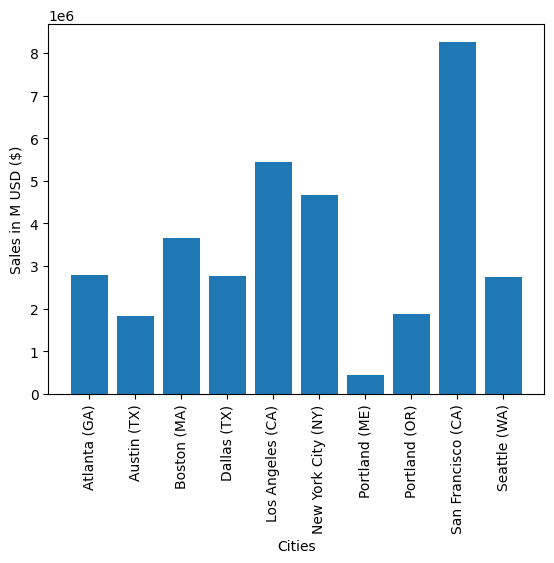

In [15]:
plt.bar(product_per_city.index, product_per_city['Sales']) #plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.ylabel('Sales in M USD ($)')
plt.xlabel('Cities')
plt.show()

### Q3: What time should we display advertisements to maximize the likelihood of customer’s buying product?

#### Add Hour and Minute Columns

In [53]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Visualization

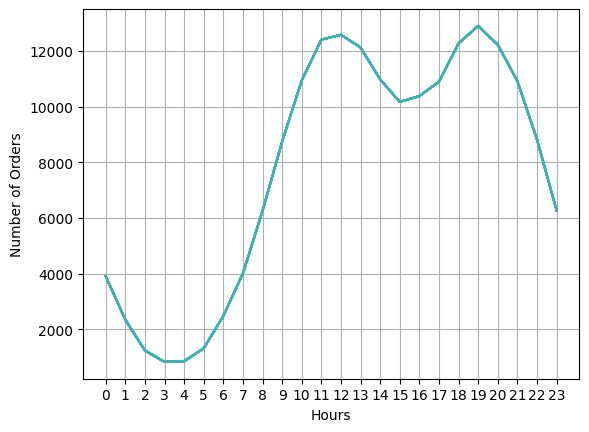

In [54]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Recommendation based on peaks

In [57]:
# Group the data by 'Hour' and count the number of orders
orders_by_hour = all_data.groupby(['Hour'])['Order ID'].count()

# Find the indices of all peaks
indices = find_peaks(orders_by_hour.values)[0]

# Get the hours corresponding to the peaks
peak_hours = orders_by_hour.index[indices]

# If there are more than two peaks, get the hours for the two highest peaks
if len(peak_hours) > 2:
    peak_values = orders_by_hour.values[indices]
    peak_hours = peak_hours[np.argsort(peak_values)[-2:]]

peak_hours = np.sort(peak_hours)
print(f"We recommend advertising around {peak_hours[0]}:00hs and {peak_hours[1]}:00hs")

We recommend advertising around 12:00hs and 19:00hs


### Q4: What products are most often sold together?

In [56]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Products for each order

In [94]:
# group_orders = all_data.groupby('Order ID')
# product_group = group_orders['Product'].transform(lambda x: ', '.join(x)) #transform() returns a DataFrame with the same index as the original DataFrame
# product_group = product_group.drop_duplicates() #drop_duplicates() returns a DataFrame with duplicate rows removed
# product_group
# Select rows where 'Order ID' is duplicated and create a copy
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

# Group by 'Order ID' and join 'Product' values in each group
df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Create a new DataFrame with only 'Order ID' and 'Grouped' columns and remove duplicates
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Counting each pair of products

In [96]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Finding the differents combinations of sales

#### Showing the most common combination

In [97]:
most_sold_together = count.most_common(1)[0]
print(f"The most sold together items are {most_sold_together[0]} with {most_sold_together[1]} sales")

The most sold together items are ('iPhone', 'Lightning Charging Cable') with 1005 sales


### Q5: What product sold the most? Why do you think it sold the most?

#### Creating new data frame

In [123]:
product_group = all_data.groupby('Product')[['Product','Quantity Ordered']]
product_group.head()

,Product,Quantity Ordered
0,USB-C Charging Cable,2
2,Bose SoundSport Headphones,1
3,Google Phone,1
4,Wired Headphones,1
5,Wired Headphones,1
...,...,...
598,LG Washing Machine,1
613,LG Washing Machine,1
867,LG Dryer,1
1422,LG Dryer,1


#### Sum and calculations

In [128]:
total_sold = product_group.sum()
total_sold['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: object

#### Most sold product

In [131]:
best_product = total_sold['Quantity Ordered'].idxmax()
print(f"The product {best_product} is the best seller with {total_sold['Quantity Ordered'].max()} sales")


The product AAA Batteries (4-pack) is the best seller with 31017 sales


#### Visualization

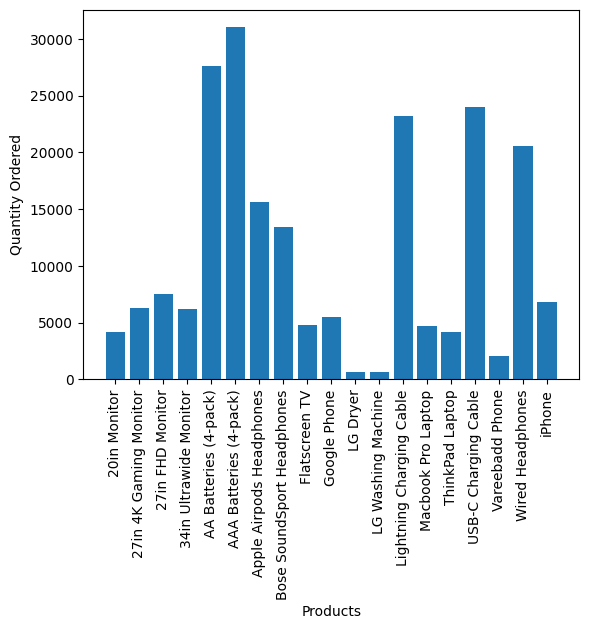

In [135]:
plt.bar(total_sold.index, total_sold['Quantity Ordered']) #plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()


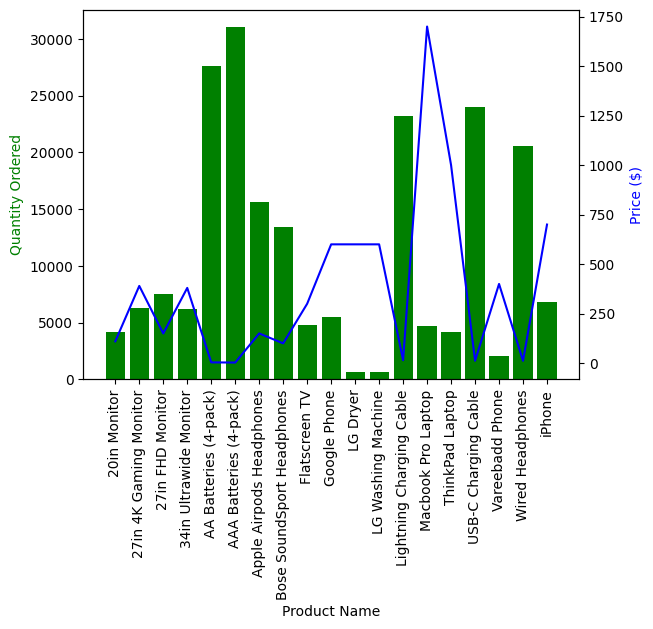

In [162]:
prices = all_data.groupby('Product').agg(mean_price=('Price Each', 'mean'))  # Calculate mean price per group
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(total_sold.index, total_sold['Quantity Ordered'], color='g')
ax2.plot(prices.index, prices['mean_price'], 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticks(range(len(total_sold.index)))
ax1.set_xticklabels(total_sold.index, rotation='vertical')
plt.show()

In [163]:
print(f"{best_product} is the best seller probably because it is the cheapest product")

AAA Batteries (4-pack) is the best seller probably because it is the cheapest product
